In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn


In [2]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]

# 将灰度图像从[0, 255]转化为[0, 1]
X_people = X_people / 255

## Comparing algorithms on the faces dataset

In [5]:
# extract eigenfaces from lfw data and transform data
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

### Analyzing the faces dataset with DBSCAN

In [6]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


We see that all the returned labels are -1, so all the data was labeled as "noise" by DBSCAN.

`eps` or `min_samples` tuning

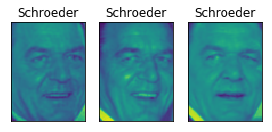

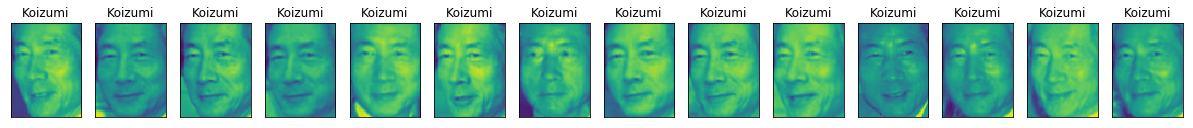

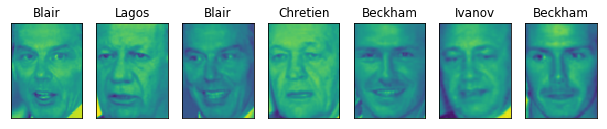

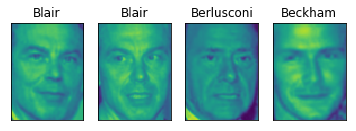

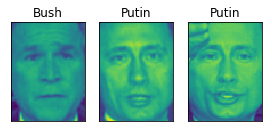

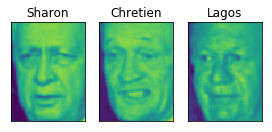

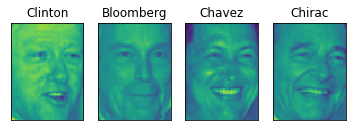

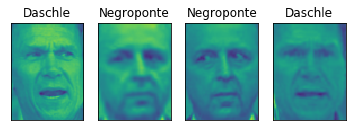

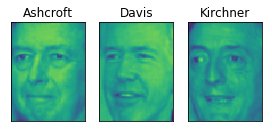

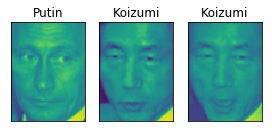

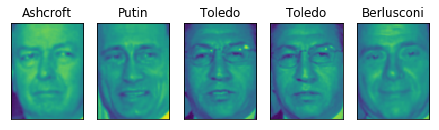

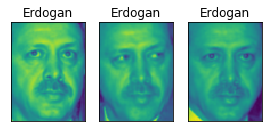

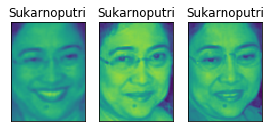

In [8]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                            subplot_kw={'xticks':(), 'yticks':()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

### Analyzing the faces dataset with k-means

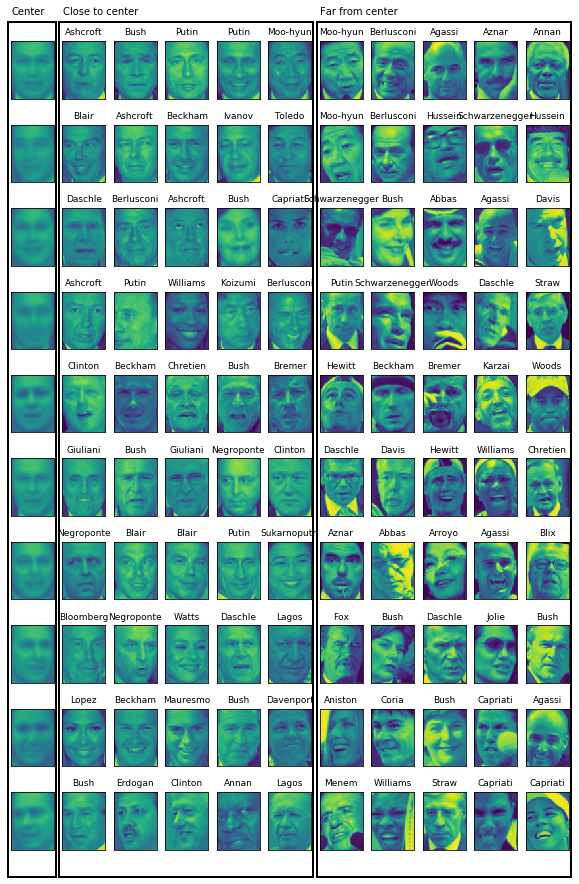

In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)